In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf

In [2]:
start =dt.datetime(2023,5,1)
end = dt.datetime(2024,5,1)
symbol = 'HDFCBANK.NS'
stock_data= yf.download(symbol,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-02,1688.699951,1699.000000,1682.000000,1687.250000,1645.648193,16110592
2023-05-03,1684.949951,1696.000000,1679.650024,1693.150024,1651.402710,14703635
2023-05-04,1687.099976,1734.449951,1687.099976,1727.800049,1685.198364,28427319
2023-05-05,1639.000000,1660.949951,1622.099976,1625.650024,1585.567017,31385208
2023-05-08,1635.000000,1650.349976,1630.000000,1644.449951,1603.903320,18622262
...,...,...,...,...,...,...
2024-04-24,1515.000000,1521.750000,1509.050049,1511.699951,1491.335083,11220790
2024-04-25,1506.250000,1519.699951,1506.250000,1510.750000,1490.397949,17722602
2024-04-26,1519.800049,1528.000000,1505.550049,1509.800049,1489.460815,12427347


In [4]:
stock_data = stock_data[['Open','High','Low','Close']]
stock_data

,Open,High,Low,Close
Date,,,,
2023-05-02,1688.699951,1699.000000,1682.000000,1687.250000
2023-05-03,1684.949951,1696.000000,1679.650024,1693.150024
2023-05-04,1687.099976,1734.449951,1687.099976,1727.800049
2023-05-05,1639.000000,1660.949951,1622.099976,1625.650024
2023-05-08,1635.000000,1650.349976,1630.000000,1644.449951
...,...,...,...,...
2024-04-24,1515.000000,1521.750000,1509.050049,1511.699951
2024-04-25,1506.250000,1519.699951,1506.250000,1510.750000
2024-04-26,1519.800049,1528.000000,1505.550049,1509.800049


In [5]:
# pip install scikit-learn

In [6]:
from sklearn.preprocessing import MinMaxScaler
Ms= MinMaxScaler()
data = Ms.fit_transform(stock_data[['Close']])
print("Shape of the data:",(data.shape))
print("Length of the data:",(len(data)))

Shape of the data: (246, 1)
Length of the data: 246


# Spliting training and testing

In [7]:
training_size= round(len(data)*0.80)
print("Training data size:",training_size)
X_train=data[:training_size]
X_test= data[training_size:]
print("X_train length:",len(X_train))
print("X_test length:",len(X_test))
Y_train=data[:training_size]
Y_test= data[training_size:]
print("Y_train length:",len(Y_train))
print("Y_test length:",len(Y_test))

Training data size: 197
X_train length: 197
X_test length: 49
Y_train length: 197
Y_test length: 49


In [8]:
from sklearn.metrics import mean_squared_error
trends =['n','t','c','ct']
lags=[1,2,3,4]

from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    for td in trends:
        model = AutoReg(X_train, lags =i,trend =td)
        model_fit = model.fit()
        
        # prediction
        test_pred = model_fit.predict(len(X_train),len(data)-1)
        
        from functions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(Y_test,test_pred)
        print("_______________________")

Lag=1,Trend=n
RMSE-Testset: 0.27317867763838527
maPe-Testset: 1.0
_______________________
Lag=1,Trend=t
RMSE-Testset: 0.38978191454515454
maPe-Testset: 1.4316116126517549
_______________________
Lag=1,Trend=c
RMSE-Testset: 0.13901102265563164
maPe-Testset: 0.45597405742425373
_______________________
Lag=1,Trend=ct
RMSE-Testset: 0.248797902850153
maPe-Testset: 0.841434084090085
_______________________
Lag=2,Trend=n
RMSE-Testset: 0.2743497389979449
maPe-Testset: 1.0083134508220792
_______________________
Lag=2,Trend=t
RMSE-Testset: 0.35566328120775137
maPe-Testset: 1.3113759478370801
_______________________
Lag=2,Trend=c
RMSE-Testset: 0.10218419321649719
maPe-Testset: 0.3447064828154308
_______________________
Lag=2,Trend=ct
RMSE-Testset: 0.2131570976049102
maPe-Testset: 0.679895238562754
_______________________
Lag=3,Trend=n
RMSE-Testset: 0.2741182082521806
maPe-Testset: 1.006839965719072
_______________________
Lag=3,Trend=t
RMSE-Testset: 0.30306219140967244
maPe-Testset: 1.11630833881

C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate t

In [9]:
len(test_pred)

49

In [10]:
i=4
td='c'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()

# make prediction
test_pred= model_fit.predict(len(X_train), len(data)-1)
#print(y_pred)

from sklearn.metrics import r2_score
mse=mean_squared_error(Y_test,test_pred,squared=False)

from functions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(Y_test,test_pred)
print("************")

Lag=4,Trend=c
RMSE-Testset: 0.08427549007123952
maPe-Testset: 0.31597446147339353
************


C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


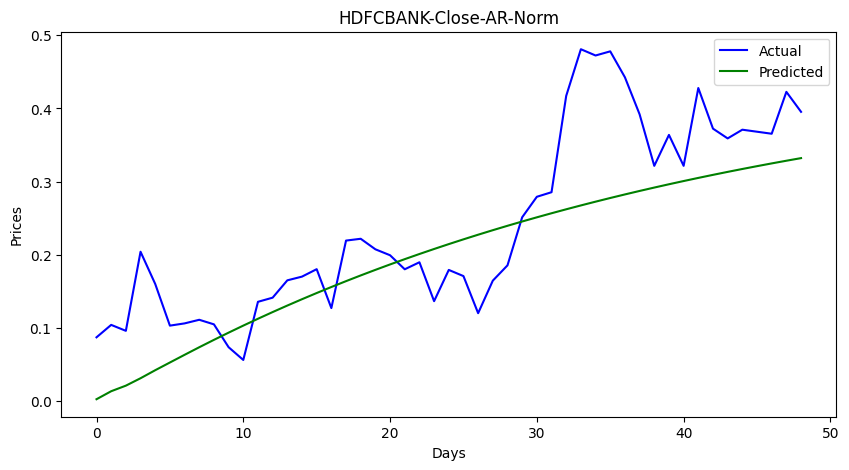

In [11]:
from functions import graph
graph(Y_test,test_pred,"Actual","Predicted","HDFCBANK-Close-AR-Norm","Days",'Prices')

In [12]:
test_pred

array([0.00257439, 0.01350014, 0.02111831, 0.03124909, 0.04221762,
       0.05274786, 0.06324813, 0.0736089 , 0.08370327, 0.09356061,
       0.10317885, 0.11255091, 0.12168373, 0.13058276, 0.13925269,
       0.14769931, 0.15592832, 0.16394518, 0.17175534, 0.17936412,
       0.1867767 , 0.19399813, 0.20103335, 0.20788714, 0.2145642 ,
       0.22106907, 0.2274062 , 0.23357991, 0.23959442, 0.24545383,
       0.25116215, 0.25672326, 0.26214096, 0.26741896, 0.27256085,
       0.27757014, 0.28245026, 0.28720454, 0.29183621, 0.29634845,
       0.30074432, 0.30502684, 0.30919893, 0.31326343, 0.31722311,
       0.32108069, 0.32483879, 0.32849998, 0.33206675])

In [13]:
from functions import conversionSingle
aTestNormTable = conversionSingle(Y_test,['Close'])
aTestNormTable

,Close
0,0.087171
1,0.10417
2,0.096034
3,0.204126
4,0.160105
5,0.103153
6,0.106204
7,0.111143
8,0.104896
9,0.07366


In [14]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [15]:
actual_stock_price_test_ori


array([[1414.05004883],
       [1419.90002441],
       [1417.09997559],
       [1454.30004883],
       [1439.15002441],
       [1419.55004883],
       [1420.59997559],
       [1422.30004883],
       [1420.15002441],
       [1409.40002441],
       [1403.40002441],
       [1430.75      ],
       [1432.69995117],
       [1440.84997559],
       [1442.59997559],
       [1446.09997559],
       [1427.80004883],
       [1459.55004883],
       [1460.40002441],
       [1455.44995117],
       [1452.65002441],
       [1446.05004883],
       [1449.34997559],
       [1431.05004883],
       [1445.75      ],
       [1442.84997559],
       [1425.40002441],
       [1440.69995117],
       [1447.90002441],
       [1470.5       ],
       [1480.15002441],
       [1482.30004883],
       [1527.59997559],
       [1549.55004883],
       [1546.59997559],
       [1548.55004883],
       [1536.34997559],
       [1518.94995117],
       [1494.69995117],
       [1509.25      ],
       [1494.69995117],
       [1531.300

In [16]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,['Close'])
actual_stock_price_test_oriA

,Close
0,1414.050049
1,1419.900024
2,1417.099976
3,1454.300049
4,1439.150024
5,1419.550049
6,1420.599976
7,1422.300049
8,1420.150024
9,1409.400024


In [17]:
# from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(test_pred,['Close'])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,['Close'])

In [18]:
predicted_stock_price_test_oriP

,Close
0,1384.936025
1,1388.69612
2,1391.317915
3,1394.80442
4,1398.579238
5,1402.203219
6,1405.816886
7,1409.382546
8,1412.856521
9,1416.248924


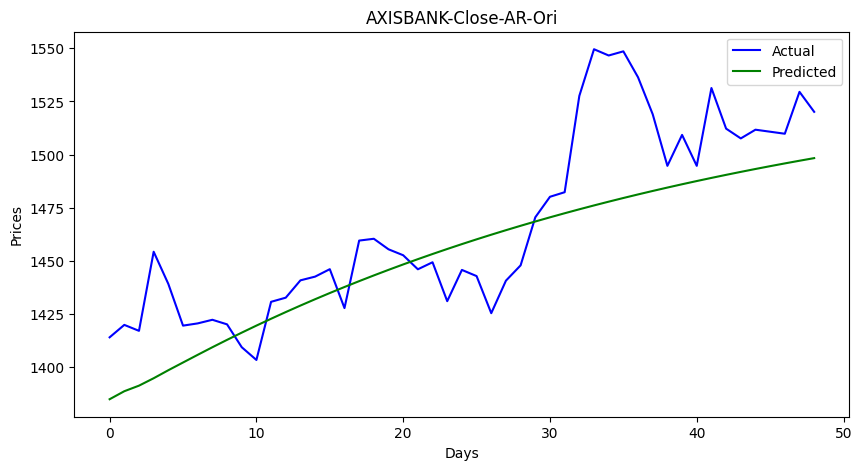

In [19]:
# from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","AXISBANK-Close-AR-Ori","Days","Prices")

In [20]:
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)


RMSE-Testset: 29.003401677988748
maPe-Testset: 0.015295347960723443


C:\Users\kathi\anaconda3\envs\tsa\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
forecast=model_fit.predict(len(data), len(data)+30)
forecast

array([0.33554155, 0.33892674, 0.34222464, 0.3454375 , 0.3485675 ,
       0.35161679, 0.35458744, 0.3574815 , 0.36030092, 0.36304763,
       0.36572352, 0.3683304 , 0.37087006, 0.37334422, 0.37575458,
       0.37810279, 0.38039045, 0.38261911, 0.3847903 , 0.3869055 ,
       0.38896615, 0.39097367, 0.39292942, 0.39483473, 0.39669091,
       0.39849923, 0.40026091, 0.40197717, 0.40364916, 0.40527805,
       0.40686492])

In [22]:
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [23]:
forecast_stock_price_test_oriF

,Closefore
0,1499.526641
1,1500.691655
2,1501.826626
3,1502.93233
4,1504.00952
5,1505.058932
6,1506.081283
7,1507.07727
8,1508.047574
9,1508.992856


In [24]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)


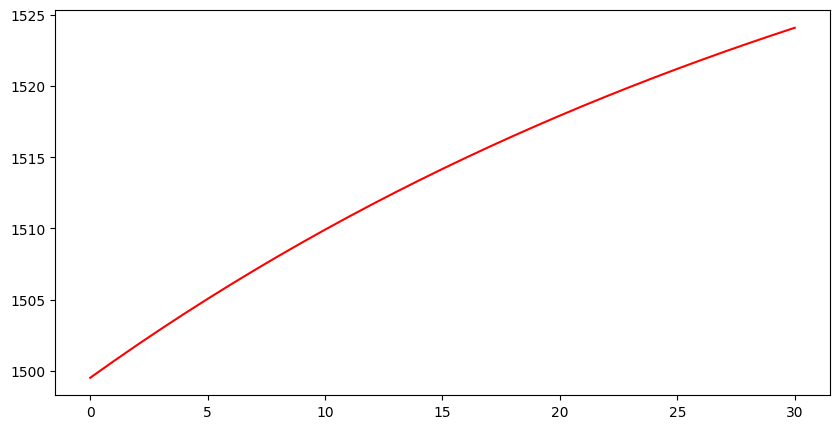

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[200:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")